In [1]:
import pandas as pd

In [3]:
data=pd.read_csv('train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
duplicate_cols=data.columns[data.columns.duplicated()]
duplicate_cols

Index([], dtype='object')

In [8]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [9]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [10]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

### UNIVARIATE SELECTION

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [44]:
feature_importance=SelectKBest(score_func=chi2,k=5)
importance=feature_importance.fit(x,y)

In [45]:
importance

SelectKBest(k=5, score_func=<function chi2 at 0x00000202FF2843A0>)

In [46]:
importance.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [47]:
col=list(data.columns)
col.pop()


'price_range'

In [49]:
feature_importance_df=pd.DataFrame(importance.scores_,columns=['score'],index=col)

In [53]:
x_feature=feature_importance_df['score'].sort_values(ascending=False)

In [56]:
feature_importance_df.nlargest(5,'score')

,score
ram,931267.519053
px_height,17363.569536
battery_power,14129.866576
px_width,9810.586750
mobile_wt,95.972863


In [57]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x,y)
etc.feature_importances_

array([0.06226854, 0.01919524, 0.03256996, 0.01939434, 0.03178803,
       0.0168811 , 0.03430804, 0.03386278, 0.03556033, 0.03205094,
       0.03209052, 0.04673476, 0.04830763, 0.40338318, 0.03234351,
       0.03327083, 0.0347271 , 0.01363152, 0.01781656, 0.0198151 ])

In [59]:
corr_matrix=data.corr()

<AxesSubplot:>

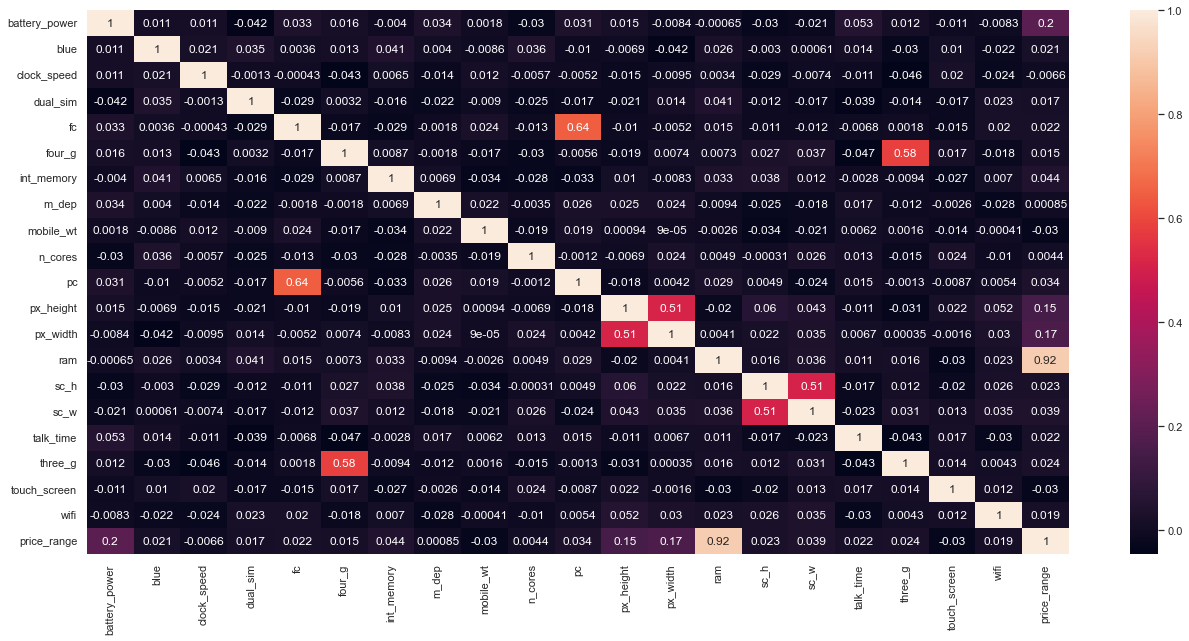

In [63]:
import seaborn as sns
sns.set(rc={'figure.figsize':(22,10)})
sns.heatmap(corr_matrix,annot=True)

In [65]:
data.shape

(2000, 21)